# 1.1 Identify the different edges present in an image using Sobel, Laplacian, and Canny edge detection algorithms, and discuss the differences in their outputs

In [3]:

def part1_1():
  # Load the image
  image_path = '/content/city_hall_zoom.png'
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)

  # Convert to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply Sobel edge detection
  sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
  sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
  sobel_combined = cv2.magnitude(sobel_x, sobel_y)

  # Apply Laplacian edge detection
  laplacian = cv2.convertScaleAbs(cv2.Laplacian(gray_image, cv2.CV_64F))

  # Apply Canny edge detection
  canny = cv2.Canny(gray_image, 100, 200)

  # Display the results
  fig, axs = plt.subplots(1, 4, figsize=(20, 5))

  # Original image
  axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  axs[0].set_title('Original Image')
  axs[0].axis('off')

  # Sobel edge detection
  axs[1].imshow(sobel_combined, cmap='gray')
  axs[1].set_title('Sobel Edge Detection')
  axs[1].axis('off')

  # Laplacian edge detection
  axs[2].imshow(laplacian, cmap='gray')
  axs[2].set_title('Laplacian Edge Detection')
  axs[2].axis('off')

  # Canny edge detection
  axs[3].imshow(canny, cmap='gray')
  axs[3].set_title('Canny Edge Detection')
  axs[3].axis('off')

  plt.show()


# 1.2 Using the provided image jigsaw.jpg, identify the boundary lines of the puzzle piece.


In [10]:

def part1_2():
  # Load the image
  image_path = '/content/jigsaw.jpg'
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  #print(image.shape)

  # Display the original image
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title('Input Image')
  plt.axis('off')
  plt.show()

  # Step 1: Crop the image
  x, y, w, h = 1300, 2024, 450, 300
  cropped_image = image[y:y+h, x:x+w]

  # Display the cropped image
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
  plt.title('Cropped Image')
  plt.axis('off')
  plt.show()

  # Step 2: Preprocess the image
  gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
  blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
  _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)

  # Display the binary image
  plt.figure(figsize=(10, 10))
  plt.imshow(binary_image, cmap='gray')
  plt.title('Binary Image')
  plt.axis('off')
  plt.show()

  # Step 3: Perform edge detection
  edges = cv2.Canny(binary_image, 50, 150, apertureSize=3)

  # Display the edges
  plt.figure(figsize=(10, 10))
  plt.imshow(edges, cmap='gray')
  plt.title('Edges Detected')
  plt.axis('off')
  plt.show()

  # Step 4: Apply Hough Transform to detect lines
  lines = cv2.HoughLines(edges, 4, np.pi / 180, 100)

  # Create a copy of the cropped image to draw lines on
  line_image = cropped_image.copy()

  # Draw the detected lines on the image
  if lines is not None:
      for rho, theta in lines[:, 0]:
          a = np.cos(theta)
          b = np.sin(theta)
          x0 = a * rho
          y0 = b * rho
          x1 = int(x0 + 1000 * (-b))
          y1 = int(y0 + 1000 * (a))
          x2 = int(x0 - 1000 * (-b))
          y2 = int(y0 - 1000 * (a))
          cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

  # Display the image with detected lines
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
  plt.title('Detected Lines')
  plt.axis('off')
  plt.show()


# Lab Task 2: Corner Detection

2.1 Apply Harris, Shi-Tomasi, and SIFT algorithms on an image to identify corners and discuss the differences in these algorithms.

In [7]:

def part2_1():
  # Load the image
  image_path = '/content/blox.jpg'
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)
  cropped_image = image[0:500, 0:500]

  # Convert the image to grayscale
  gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

  # Step 2: Apply Harris Corner Detection
  gray = np.float32(gray_image)
  harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
  harris_corners = cv2.dilate(harris_corners, None)
  harris_image = cropped_image.copy()
  harris_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

  # Step 3: Apply Shi-Tomasi Corner Detection
  corners = cv2.goodFeaturesToTrack(gray_image, 100, 0.01, 31)
  corners = np.int0(corners)
  shi_tomasi_image = cropped_image.copy()
  for corner in corners:
      x, y = corner.ravel()
      cv2.circle(shi_tomasi_image, (x, y), 3, (0, 255, 0), -1)

  # Step 4: Apply SIFT Feature Detection
  sift = cv2.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(gray_image, None)
  sift_image = cv2.drawKeypoints(cropped_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display the results
  plt.figure(figsize=(20, 20))

  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(harris_image, cv2.COLOR_BGR2RGB))
  plt.title('Harris Corner Detection')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(cv2.cvtColor(shi_tomasi_image, cv2.COLOR_BGR2RGB))
  plt.title('Shi-Tomasi Corner Detection')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
  plt.title('SIFT Feature Detection')
  plt.axis('off')

  plt.show()


2.2 Using the provided image jigsaw.jpg, identify the corners present in the puzzle piece.

In [5]:
def part2_2_i():
  # Load the image
  image_path = '/content/jigsaw.jpg'
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)

  # Crop the region containing the puzzle piece (same region as before)
  x, y, w, h = 1300, 1950, 450, 400
  cropped_image = image[y:y+h, x:x+w]

  # Convert the image to grayscale
  gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

  # Harris Corner Detection
  gray = np.float32(gray_image)
  harris_corners = cv2.cornerHarris(gray, 2, 3, 0.04)
  harris_corners = cv2.dilate(harris_corners, None)
  harris_image = cropped_image.copy()
  harris_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

  # Shi-Tomasi Corner Detection
  corners = cv2.goodFeaturesToTrack(gray_image, 4, 0.01, 200)
  corners = np.int0(corners)
  shi_tomasi_image = cropped_image.copy()
  for corner in corners:
      x, y = corner.ravel()
      cv2.circle(shi_tomasi_image, (x, y), 3, (0, 255, 0), -1)

  # SIFT Feature Detection
  sift = cv2.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(gray_image, None)
  sift_image = cv2.drawKeypoints(cropped_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  # Display the results
  plt.figure(figsize=(20, 20))

  plt.subplot(1, 3, 1)
  plt.imshow(cv2.cvtColor(harris_image, cv2.COLOR_BGR2RGB))
  plt.title('Harris Corner Detection')
  plt.axis('off')

  plt.subplot(1, 3, 2)
  plt.imshow(cv2.cvtColor(shi_tomasi_image, cv2.COLOR_BGR2RGB))
  plt.title('Shi-Tomasi Corner Detection')
  plt.axis('off')

  plt.subplot(1, 3, 3)
  plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
  plt.title('SIFT Feature Detection')
  plt.axis('off')

  plt.show()


In [6]:

def part2_2():
  # Load the image
  image_path = '/content/jigsaw.jpg'
  image = cv2.imread(image_path, cv2.IMREAD_COLOR)

  # Crop the region containing the puzzle piece
  x, y, w, h = 1250, 1950, 500, 450
  cropped_image = image[y:y+h, x:x+w]

  # Step 2: Preprocess the image
  gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)
  blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
  _, binary_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY_INV)

  # Use morphological operations to remove small noise
  kernel = np.ones((5, 5), np.uint8)
  cleaned_binary = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)

  # Perform edge detection
  edges = cv2.Canny(cleaned_binary, 50, 150, apertureSize=3)

  # Find contours and filter out small contours
  contours, _ = cv2.findContours(cleaned_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 500]

  # Smooth the contours by approximating them
  smoothed_contours = []
  for contour in filtered_contours:
      epsilon = 0.01 * cv2.arcLength(contour, True)
      approx_contour = cv2.approxPolyDP(contour, epsilon, True)
      smoothed_contours.append(approx_contour)

  # Create an empty image to draw the smoothed contours
  smoothed_image = np.zeros_like(edges)
  cv2.drawContours(smoothed_image, smoothed_contours, -1, 255, thickness=cv2.FILLED)

  # Apply Shi-Tomasi Corner Detection on the smoothed image
  corners = cv2.goodFeaturesToTrack(smoothed_image, 4, 0.01, 180)
  corners = np.int0(corners)

  # Create a copy of the cropped image to draw corners on
  corner_image = cropped_image.copy()
  for corner in corners:
      x, y = corner.ravel()
      cv2.circle(corner_image, (x, y), 5, (255, 0, 0), -1)  # Red color

  # Display the image with detected corners
  plt.figure(figsize=(10, 10))
  plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
  plt.title('Smoothed and Filtered Jigsaw Shape')
  plt.axis('off')
  plt.show()


Task 1.1: Identify the different edges present in an image using Sobel, Laplacian, and Canny edge detection algorithms,


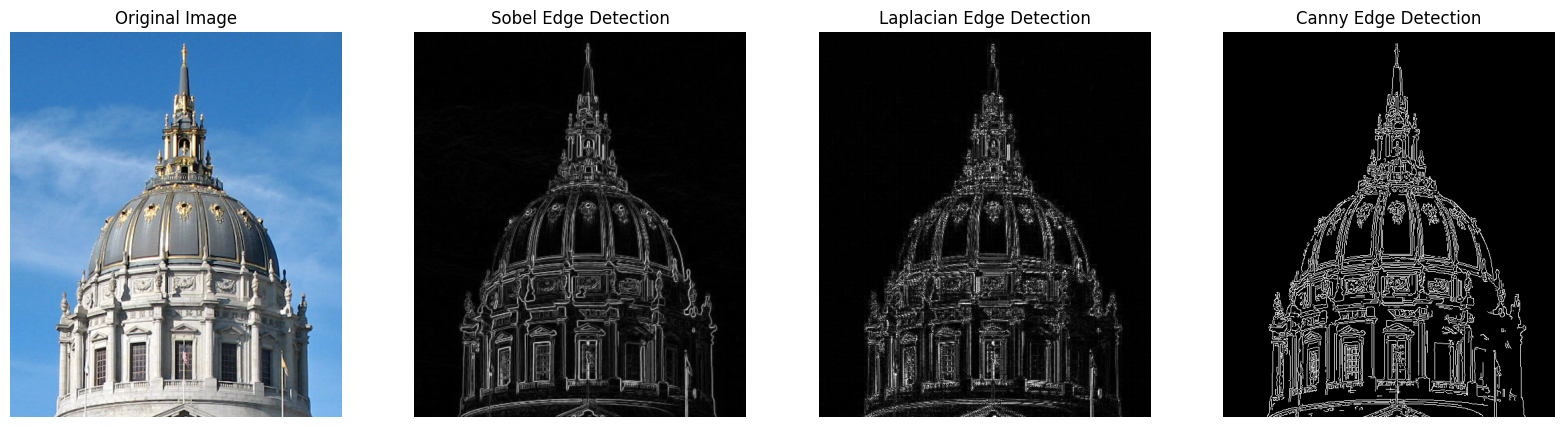



Task 1.2: Using the provided image jigsaw.jpg, identify the boundary lines of the puzzle piece.


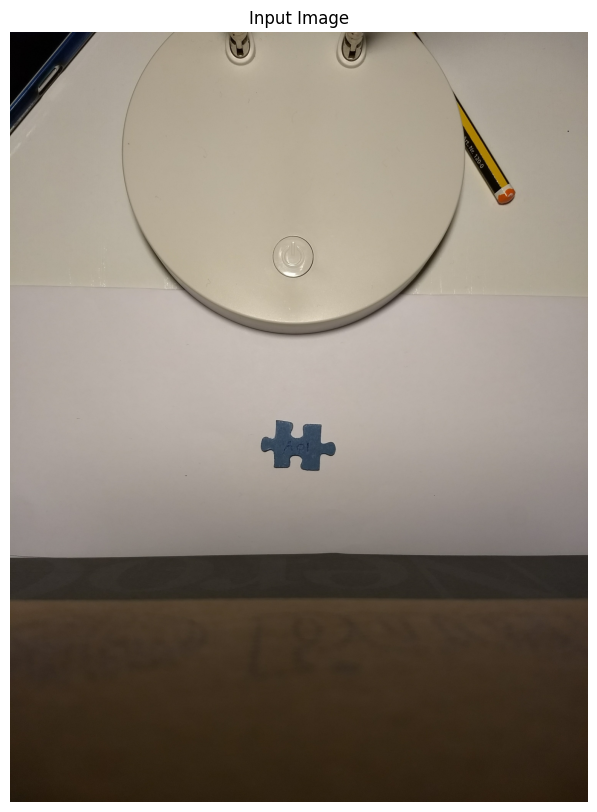

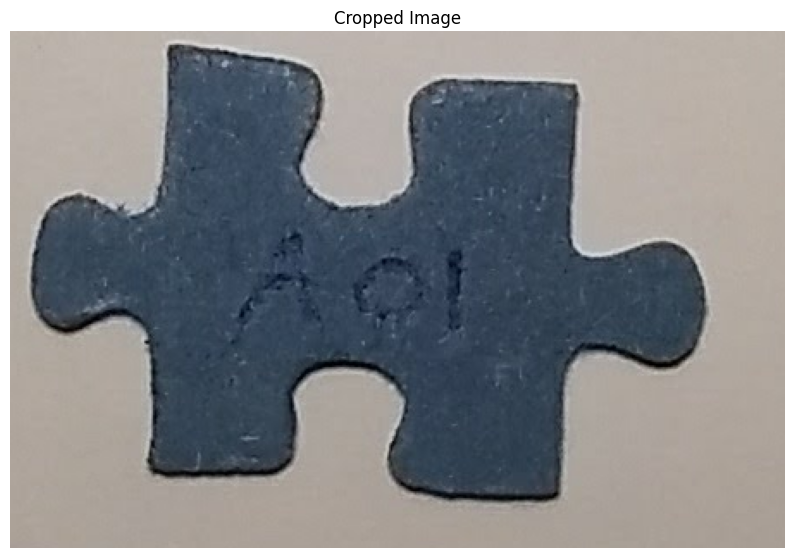

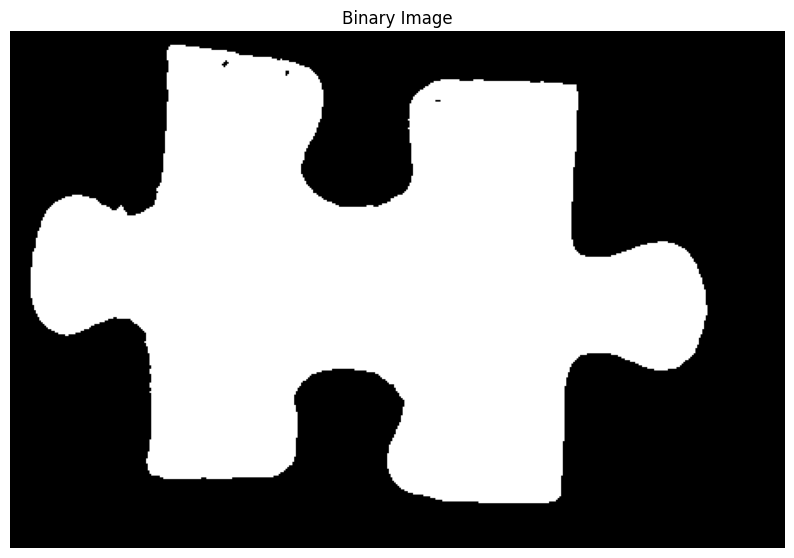

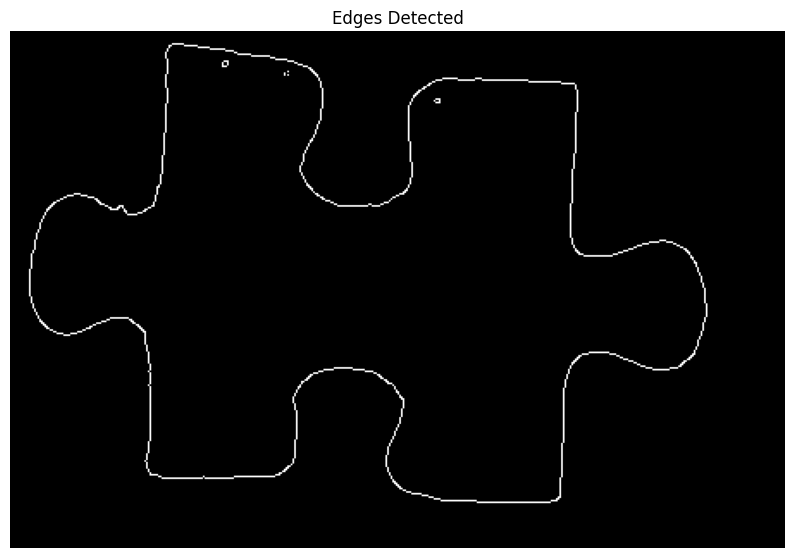

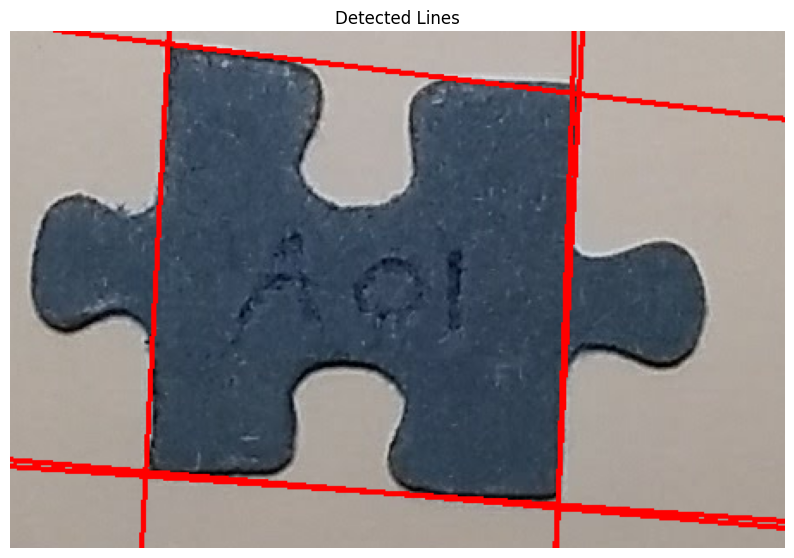



Task 2.1: Apply Harris, Shi-Tomasi, and SIFT algorithms on an image to identify corners 


<ipython-input-7-0f5137a6496c>:19: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


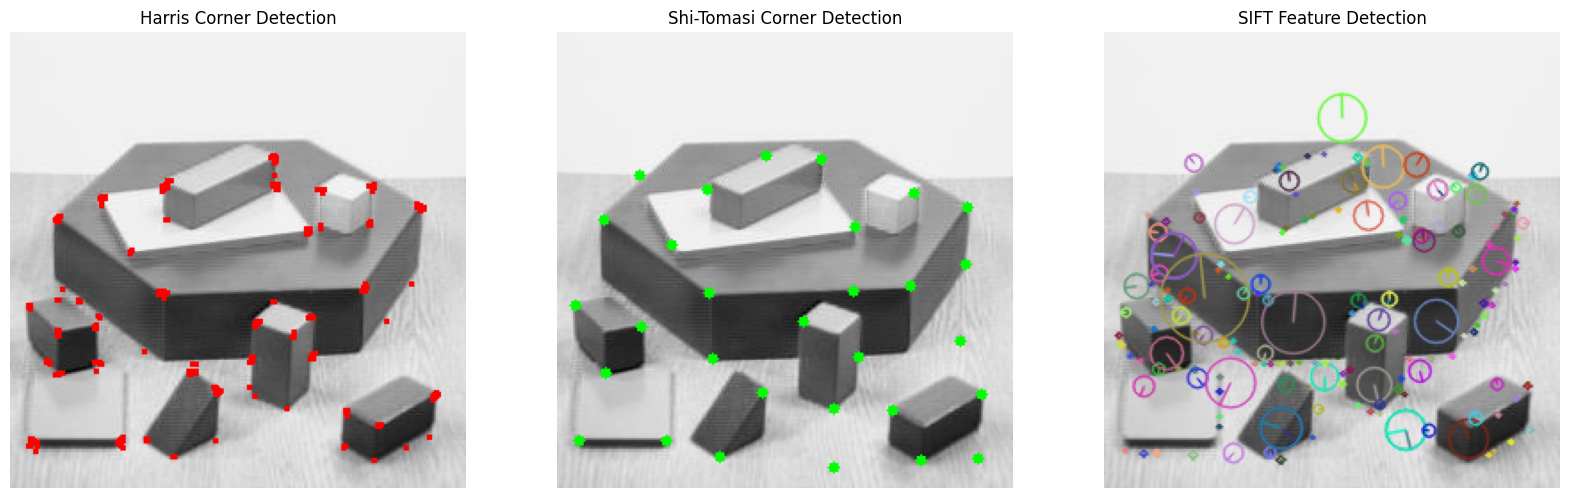



 Task 2.2: Using the provided image jigsaw.jpg, identify the corners present in the puzzle piece.


<ipython-input-6-dbeef066c3d9>:39: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


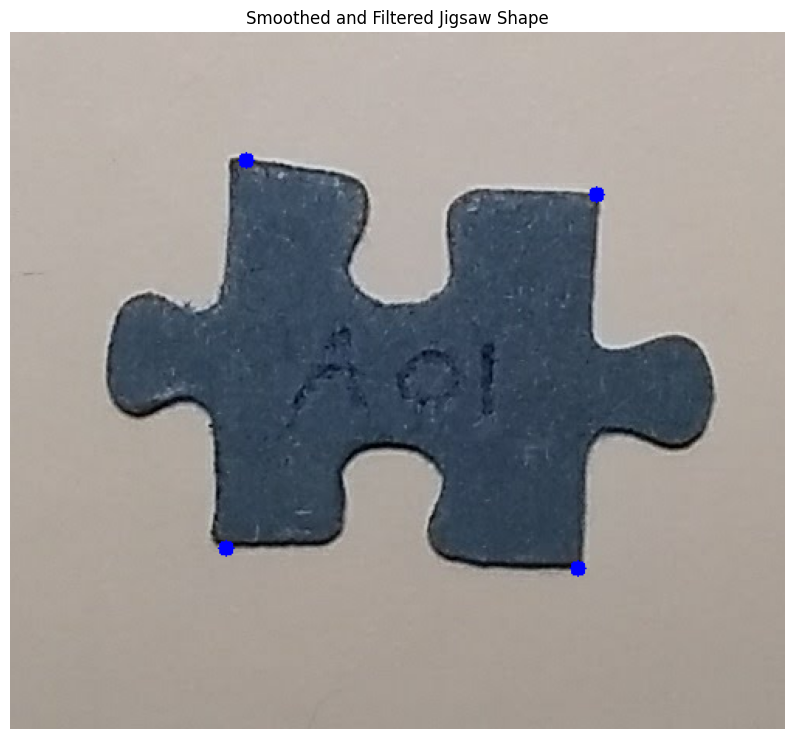

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def main():
  print("Task 1.1: Identify the different edges present in an image using Sobel, Laplacian, and Canny edge detection algorithms,")
  part1_1()
  print('\n')
  print("Task 1.2: Using the provided image jigsaw.jpg, identify the boundary lines of the puzzle piece.")
  part1_2()
  print('\n')
  print("Task 2.1: Apply Harris, Shi-Tomasi, and SIFT algorithms on an image to identify corners ")
  part2_1()
  print('\n')
  print(" Task 2.2: Using the provided image jigsaw.jpg, identify the corners present in the puzzle piece.")
  part2_2()


if __name__ == "__main__":
  main()
